# **Twitch Streamers 2020**

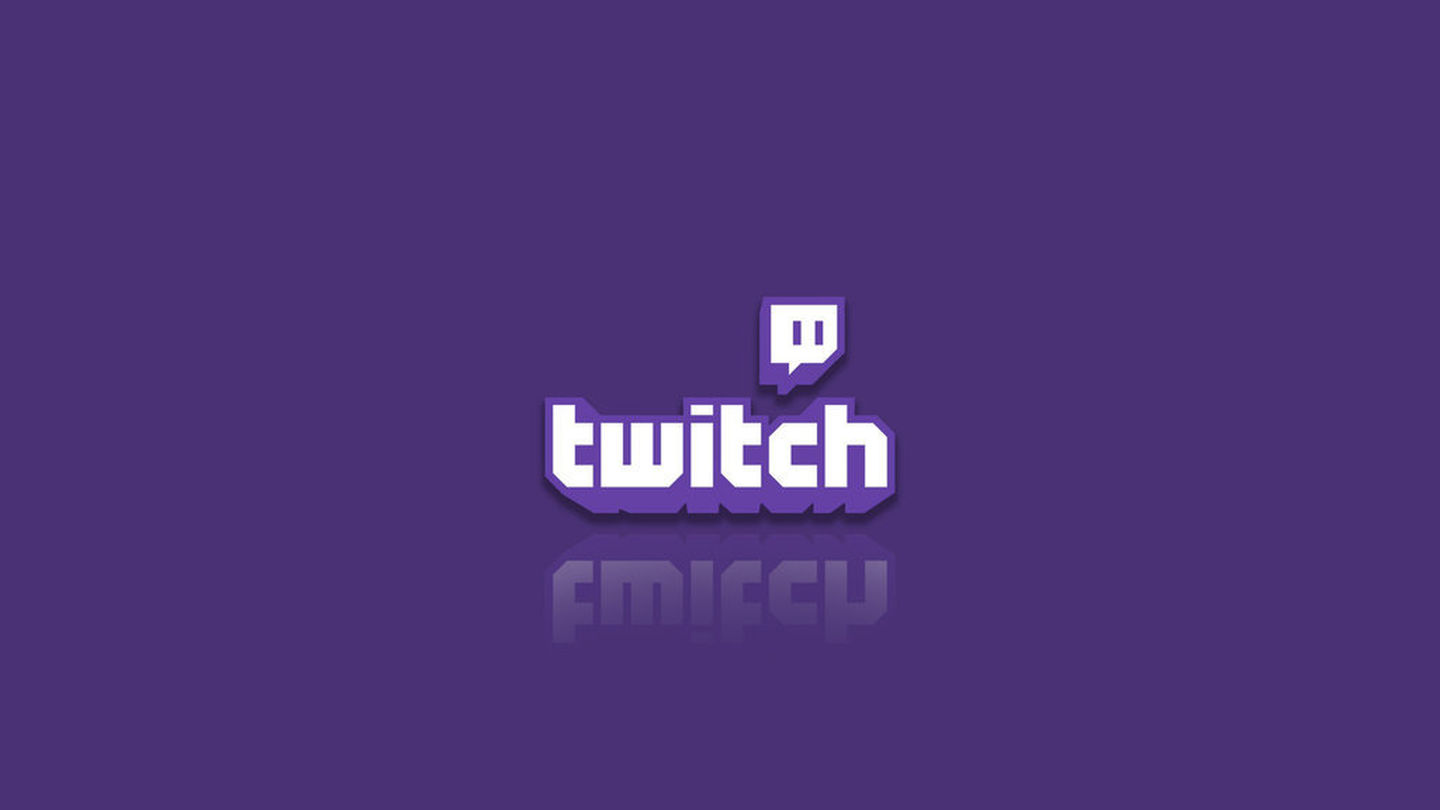

---

# Index
* [1. Import packages](#import_packages)
* [2. Read data](#read)
* [3. Data info](#data_info)
* [4. Data cleaning](#data_cleaning)
    * [4.1 NA Values](#na)
* [5. Data analysis](#data_analysis)
    * [5.1 Mature streamers](#mature)
    * [5.2 Languages](#languages)
    * [5.3 Most viewed streamers](#most_viewed)
* [6. Heatmap](#heatmap)

## 1. Import packages
<a id='import_packages'></a>

In [ ]:
# Data Manipulation
import numpy as np
import pandas as pd

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# OS
import os

## 2. Read data
<a id='read'></a>

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
filename = "/kaggle/input/twitchdata/twitchdata-update.csv"
tw = pd.read_csv(filename)
tw.head()

## 3. Data info
<a id='data_info'></a>

In [ ]:
print(f"This data frame about Twitch streamers, has {tw.shape[0]} rows and {tw.shape[1]} columns.")

In [ ]:
tw.info()

## 4. Data cleaning
<a id='data_cleaning'></a>

### 4.1 NA Values
<a id='na'></a>

In [ ]:
tw.isna().sum()

This data frame is amazing! We don't have any NA or NaN values!
<br>
We can keep going without worrying about NA values.

## 5. Data analysis
<a id='data_analysis'></a>

### 5.1 Mature streamers
<a id='mature'></a>

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="Mature", data=tw)
plt.title("Mature (+18) streamers")
plt.show()

We can see most of the streamers are mature, but we have other part which they are not mature, maybe younger people finding his job in this streamer job.

### 5.2 Languages
<a id='languages'></a>count

In [ ]:
languages_values = tw["Language"].value_counts()
languages_values

In [ ]:
languages = tw["Language"].unique()
languages

In [ ]:
fig = plt.figure(figsize=(10, 6))
languages_sns = sns.barplot(x=languages[:10], y=languages_values[:10])
languages_sns.set(xlabel="Languages", ylabel="Streamers languages")
plt.title("Twitch Top 10 Languages")
plt.xticks(rotation=45)
plt.show()

### 5.3 Most viewed streamers
<a id='most_viewed'></a>

In [ ]:
def get_top_viewed_streamers_plot(language):
    '''Get streamers stream language and make a plot with the TOP streamers'''
    
    filter_lng = language.title()
    streamers_language = tw.loc[tw["Language"] == filter_lng]
    streamers_language.reset_index(drop=True, inplace=True)
    
    streamer = streamers_language["Channel"]
    most_viewed = streamers_language["Watch time(Minutes)"]
    
    fig = plt.figure(figsize=(10, 6))
    plot = sns.barplot(x=streamer[:10], y=most_viewed[:10], palette="muted")
    plt.title(f"Top 10 streamers most viewed in {language} in 2020")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
get_top_viewed_streamers_plot("spanish")

### 5.4 Streamers with most followers

In [ ]:
test_df = tw[["Channel", "Followers"]]
test_df = test_df.sort_values(by="Followers", ascending=False)

fig = plt.figure(figsize=(10, 6))
followers = sns.barplot(x=test_df["Channel"][:10], y=test_df["Followers"][:10], palette="plasma")
plt.title("Top 10 streamers with most followers in 2020")
plt.xticks(rotation=45)
plt.show()

With this plot, we can see the streamers with most followers in Twitch in *2020*.
<br>
As well, we have:
* **shroud** good streamer related with shooter games (Valorant, PUBG, EFT).
* **Rubius** one of the first YouTubers in Spain with his special content, very famous.
* **Riot Games** maker of LOL and Valorant.
* **DrDisrespect** excellent streamer related with Call of Duty.

## 6. Heatmap
<a id='heatmap'></a>

**Correlation matrix**
<br>
*.corr()* -> Make the correlation matrix with our variables in our data frame

In [ ]:
fig = plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(tw[["Channel", "Followers", "Followers gained", "Views gained", "Mature", "Language"]].corr(), annot=True)
plt.show()

With this *heatmap* or *correlation matrix*, we can't get a lot of conclusions.
<br>
The variables with most relation with each other are *Followers* and *Followers gained* something obvious, but we can take it and keep it in mind.